In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-data-analysis/Heart Attack Data Set.csv


In [3]:
df_raw = pd.read_csv('/kaggle/input/heart-attack-data-analysis/Heart Attack Data Set.csv')

# Dicionário de dados do Dataset

**Dados Demográficos**

age: Idade do paciente (em anos).

sex: Sexo biológico do paciente (1 = Homem; 0 = Mulher).

**Sintomas e Exames Clínicos Simples**

cp (Chest Pain type): Tipo de dor no peito relatada.

0 = Angina típica (dor no peito clássica por falta de sangue no coração).

1 = Angina atípica (dor no peito, mas não com as características clássicas).

2 = Dor não anginosa (geralmente espasmos ou problemas em outros músculos/órgãos).

3 = Assintomático (sem dor).

trestbps (Resting Blood Pressure): Pressão arterial do paciente em repouso (em mm Hg).

chol: Colesterol sérico (em mg/dl).

fbs (Fasting Blood Sugar): Açúcar no sangue em jejum. Se for maior que 120 mg/dl, recebe o valor 1 (Verdadeiro). Se for menor, recebe 0 (Falso). É um indicativo para diabetes.

**Resultados de Eletrocardiograma (ECG) e Testes de Esforço**

restecg (Resting ECG): Resultados do eletrocardiograma em repouso.

0 = Normal.

1 = Anormalidade da onda ST-T (pode indicar problemas na forma como o coração relaxa após bater).

2 = Provável hipertrofia ventricular esquerda (o músculo do coração está aumentado/espesso).

thalach (Maximum Heart Rate): Frequência cardíaca (batimentos por minuto) máxima atingida pelo paciente durante um teste de esforço físico na esteira.

exang (Exercise Induced Angina): Angina (dor no peito) induzida por exercício físico (1 = Sim; 0 = Não).

oldpeak: Uma medida no eletrocardiograma chamada "Depressão do segmento ST". Ela mede a diferença no gráfico do coração entre o momento de maior esforço e o momento de descanso.

slope (Slope): A inclinação do segmento ST no gráfico do eletrocardiograma durante o pico do exercício. Pode ser: 0 = Descendente, 1 = Plano, 2 = Ascendente.

**Exames de Imagem**

ca (Number of major vessels): Número de vasos sanguíneos principais (de 0 a 3) que ficaram visíveis após serem coloridos por um exame chamado fluoroscopia. Se o vaso aparece bem colorido, significa que não está entupido e o sangue está fluindo bem.

thal: Resultado do teste de estresse com tálio (um tipo de exame de imagem que avalia o fluxo de sangue no músculo do coração).

1 = Defeito fixo (o sangue não chega em alguma parte do coração, indicando possível cicatriz de infarto anterior).

2 = Normal (fluxo sanguíneo normal).

3 = Defeito reversível (o fluxo de sangue é normal em repouso, mas diminui quando o coração faz esforço).

**O Diagnóstico**

target: É a conclusão do diagnóstico médico.

0 = Menor chance de ter um ataque cardíaco (coração mais saudável).

1 = Maior chance de ter um ataque cardíaco (presença de doença cardíaca).

In [4]:
df_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_raw.shape

(303, 14)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df_raw.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **> Limpeza e Organização dos dados**

**Renomeando as colunas:**

In [8]:
df = df_raw.copy()

In [9]:
novos_nomes = {
    'age': 'idade',
    'sex': 'sexo',
    'cp': 'tipo_dor_peito',
    'trestbps': 'pressao_arterial_repouso',
    'chol': 'colesterol',
    'fbs': 'acucar_sangue_jejum',
    'restecg': 'ecg_repouso',
    'thalach': 'freq_cardiaca_max',
    'exang': 'angina_exercicio',
    'oldpeak': 'depressao_st',
    'slope': 'inclinacao_st',
    'ca': 'num_vasos_principais',
    'thal': 'resultado_talio',
    'target': 'risco_ataque_cardiaco'
}

#Nomes traduzidos e sugeridos pelo Gemini

In [10]:
df.rename(columns=novos_nomes, inplace=True)

In [11]:
print(df.columns)

Index(['idade', 'sexo', 'tipo_dor_peito', 'pressao_arterial_repouso',
       'colesterol', 'acucar_sangue_jejum', 'ecg_repouso', 'freq_cardiaca_max',
       'angina_exercicio', 'depressao_st', 'inclinacao_st',
       'num_vasos_principais', 'resultado_talio', 'risco_ataque_cardiaco'],
      dtype='object')


In [12]:
df.head()

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_sangue_jejum,ecg_repouso,freq_cardiaca_max,angina_exercicio,depressao_st,inclinacao_st,num_vasos_principais,resultado_talio,risco_ataque_cardiaco
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Substituindo valores categóricos:**

In [13]:
df['sexo'] = df['sexo'].replace({1: 'Homem', 0: 'Mulher'})

In [14]:
dicionario_dor = {
    0: 'Angina Típica',
    1: 'Angina Atípica',
    2: 'Não Anginosa',
    3: 'Assintomático'
}

#Nomes traduzidos e sugeridos pelo Gemini

In [15]:
df['tipo_dor_peito'] = df['tipo_dor_peito'].replace(dicionario_dor) 

In [16]:
dicionario_risco_ataque_cardiaco = {
    0: 'Menor Risco',
    1: 'Maior Risco'
}

In [17]:
df['risco_ataque_cardiaco'] = df['risco_ataque_cardiaco'].replace(dicionario_risco_ataque_cardiaco)

In [18]:
print(df[['sexo','tipo_dor_peito', 'risco_ataque_cardiaco']].head())

     sexo  tipo_dor_peito risco_ataque_cardiaco
0   Homem   Assintomático           Maior Risco
1   Homem    Não Anginosa           Maior Risco
2  Mulher  Angina Atípica           Maior Risco
3   Homem  Angina Atípica           Maior Risco
4  Mulher   Angina Típica           Maior Risco


# > **Análise Exploratória Demográfica**

**Qual é o tamanho do nosso grupo de estudo?**

In [19]:
sns.set_theme(style="whitegrid")

In [20]:
qtd_pacientes = df.shape[0]
qtd_variaveis = df.shape[1]

print(f"O dataset contém dados de {qtd_pacientes} pacientes.")
print(f"Temos {qtd_variaveis} informações diferentes para cada paciente.")

O dataset contém dados de 303 pacientes.
Temos 14 informações diferentes para cada paciente.


**Qual é a distribuição por Sexo?**

In [21]:
contagem_sexo = df['sexo'].value_counts()
print('\nQuantidade de pacientes por sexo:')
print(contagem_sexo)

porcentagem_sexo = df['sexo'].value_counts(normalize=True) * 100
print('\nPorcentagem de pacientes por sexo (%):')
print(porcentagem_sexo.round(2))


Quantidade de pacientes por sexo:
sexo
Homem     207
Mulher     96
Name: count, dtype: int64

Porcentagem de pacientes por sexo (%):
sexo
Homem     68.32
Mulher    31.68
Name: proportion, dtype: float64


/tmp/ipykernel_55/675774654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sexo', data=df, palette='Set2')


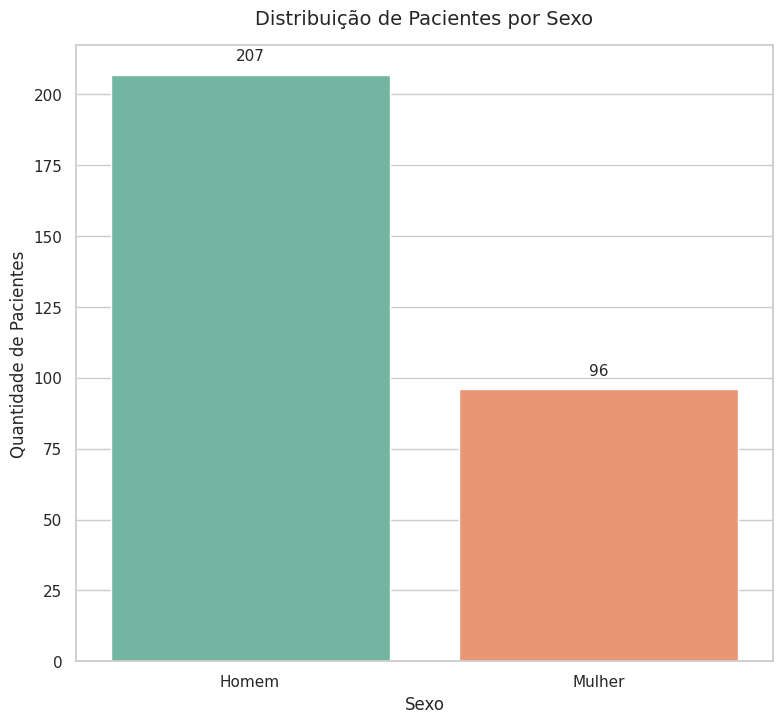

In [22]:
plt.figure(figsize=(9, 8))
ax = sns.countplot(x='sexo', data=df, palette='Set2')

plt.title('Distribuição de Pacientes por Sexo', fontsize=14, pad=15)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, padding=8, fontsize=11)

plt.show()

**Qual é o perfil de Idade dos pacientes?**

In [23]:
resumo_idade = df['idade'].describe()
print('\nResumo das idades dos pacientes:')
print(resumo_idade)

idade_min = df['idade'].min()
idade_max = df['idade'].max()
idade_med = df['idade'].mean()


print(f'\nO paciente mais novo tem {idade_min} anos.')
print(f'\nO paciente mais velho tem {idade_max} anos.')
print(f'\nA média de idade do grupo é de {idade_med:.1f} anos.')


Resumo das idades dos pacientes:
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: idade, dtype: float64

O paciente mais novo tem 29 anos.

O paciente mais velho tem 77 anos.

A média de idade do grupo é de 54.4 anos.


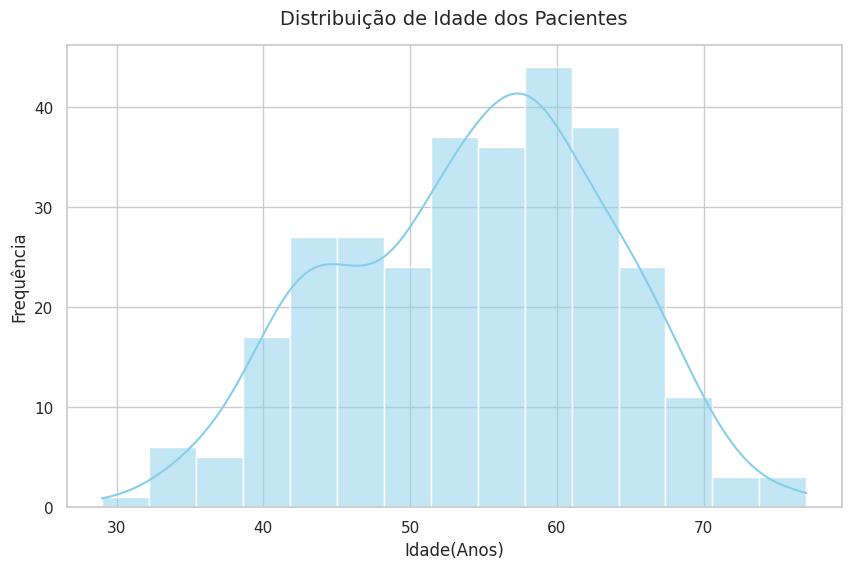

In [24]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='idade', bins=15, kde=True, color='skyblue')

plt.title('Distribuição de Idade dos Pacientes', fontsize=14, pad=15)
plt.xlabel('Idade(Anos)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

**Distribuição de idade separada por sexo**

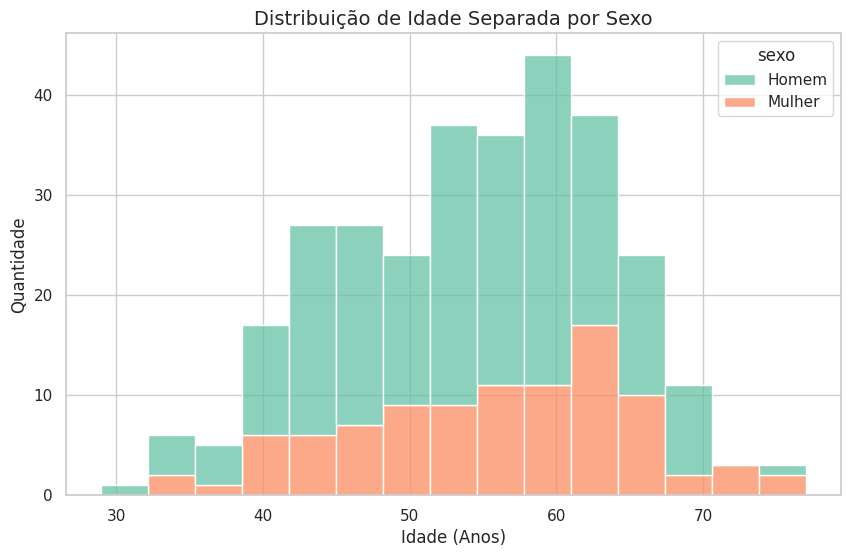

In [25]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='idade', hue='sexo', multiple='stack', bins=15, palette='Set2')

plt.title('Distribuição de Idade Separada por Sexo', fontsize=14)
plt.xlabel('Idade (Anos)')
plt.ylabel('Quantidade')

plt.show()


Perguntas que me surgiram durante a análise demográfica:
1. A quantidade de homens presente nesse dataset é muito maior que de mulheres.
2. A faixa etária maior varia de 50 á 70 anos.

* Homens infartam mais que mulheres? Ou o hospital que coletou esses dados simplesmente atende mais homens nessa faixa etária?
* A idade avançada é o maior fator?

# **Análise Bivariada**

Como a quantidade de homens é muito maior que a de mulheres, é natural que, em números absolutos, vejamos mais homens com risco de ataque cardíado. Por isso precisamos olhar para as proporções (porcentagens) dentro de cada grupo.

**Risco de ataque cardíaco de acordo com o sexo**

In [26]:
risco_por_sexo = pd.crosstab(df['sexo'], df['risco_ataque_cardiaco'], normalize='index') * 100
print('Porcentagem de Risco dentro de cada Sexo:')
print(risco_por_sexo.round(2))

Porcentagem de Risco dentro de cada Sexo:
risco_ataque_cardiaco  Maior Risco  Menor Risco
sexo                                           
Homem                        44.93        55.07
Mulher                       75.00        25.00


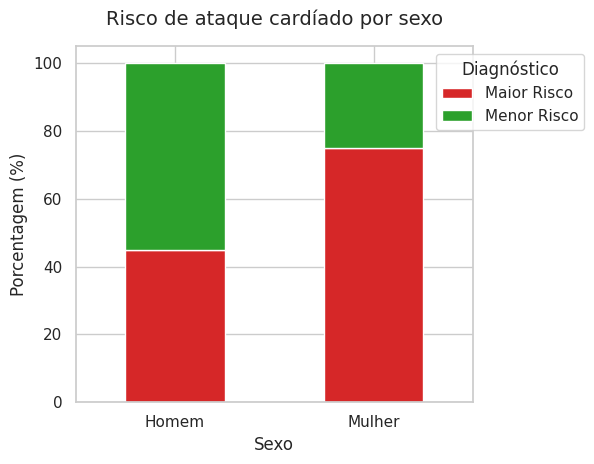

In [27]:
ax = risco_por_sexo.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'])

plt.title('Risco de ataque cardíado por sexo', fontsize=14, pad=15)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)

plt.xticks(rotation=0)

plt.legend(title='Diagnóstico', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()

plt.show()

**Resolução das dúvidas que apresentei acima:**
Apesar do número de homens nesse dataset ser muito maior, ao isolar cada grupo, percebemos que a porcentagem de risco é muito maior no grupo de mulheres (cerca de 75%).

**Viés de Amostragem (Sample Bias).**
Esses dados refletem a realidade apresentado nesse hospital em específico, mas que não significa necessariamente que mulheres têm mais ataques cardíacos que homens na população mundial.



**Risco de ataque cardíado de acordo com a idade**

In [28]:
faixas = [20,40,50,60,80]
labels_faixas = ['Até 40 anos', '41-50 anos', '51-60 anos', 'Mais de 60 anos']

df['faixa_etaria'] = pd.cut(df['idade'], bins=faixas, labels=labels_faixas)

print('\nQuantidade de pacientes por faixa etária:')
print(df['faixa_etaria'].value_counts().sort_index())
print("-" * 40)

risco_por_idade = pd.crosstab(df['faixa_etaria'], df['risco_ataque_cardiaco'], normalize='index') * 100
print('\nPorcentagem de Risco por Faixa Etária:')
print(risco_por_idade.round(2))



Quantidade de pacientes por faixa etária:
faixa_etaria
Até 40 anos         19
41-50 anos          76
51-60 anos         129
Mais de 60 anos     79
Name: count, dtype: int64
----------------------------------------

Porcentagem de Risco por Faixa Etária:
risco_ataque_cardiaco  Maior Risco  Menor Risco
faixa_etaria                                   
Até 40 anos                  68.42        31.58
41-50 anos                   69.74        30.26
51-60 anos                   49.61        50.39
Mais de 60 anos              44.30        55.70


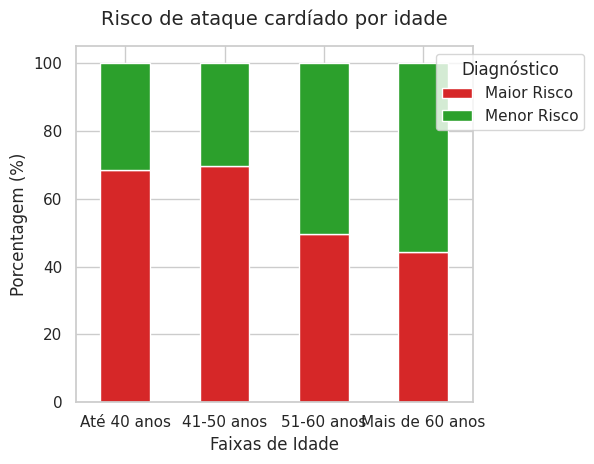

In [29]:
ax = risco_por_idade.plot(kind='bar', stacked=True, color=['#d62728', '#2ca02c'])

plt.title('Risco de ataque cardíado por idade', fontsize=14, pad=15)
plt.xlabel('Faixas de Idade', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)

plt.xticks(rotation=0)

plt.legend(title='Diagnóstico', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()

plt.show()

**Observação Demográfica:** O histograma revela que a maior concentração de pacientes testados neste dataset (129 pessoas) encontra-se na faixa de 51 a 60 anos. Isso indica que esta é a faixa etária com maior volume de dados coletados pelo hospital, refletindo provavelmente a idade em que check-ups cardiológicos e exames de esforço se tornam mais frequentes na rotina médica, e não necessariamente a faixa de maior risco percentual.

**Conclusão sobre Idade vs. Risco:** Ao analisar as proporções, notamos uma tendência contraintuitiva: as faixas etárias mais jovens (Até 40 anos e 41-50 anos) apresentam o maior percentual de diagnóstico de alto risco. Isso ocorre devido ao viés de seleção da amostra. Um paciente de 45 anos geralmente não realiza exames cardiológicos complexos (como testes de esforço e angiografia) apenas por rotina; ele geralmente é encaminhado porque já apresenta sintomas graves prévios. Já pacientes acima de 60 anos realizam esses exames frequentemente por precaução ou rotina, o que aumenta o número de diagnósticos negativos (Menor Risco) nessa faixa mais velha.


A correlação matemática entre Idade e Risco é: -0.23


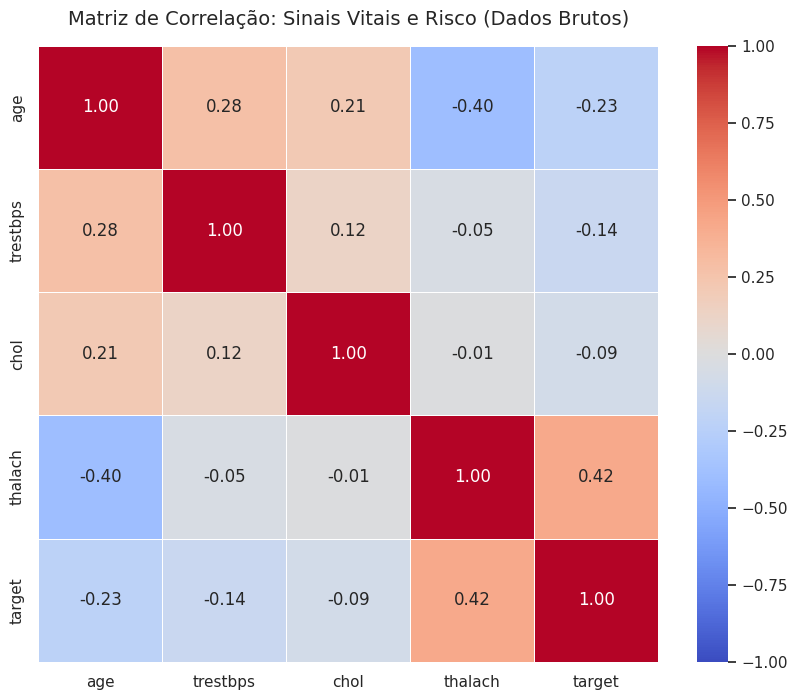

In [30]:
correlacao_idade_risco = df_raw['age'].corr(df_raw['target'])
print(f"\nA correlação matemática entre Idade e Risco é: {correlacao_idade_risco:.2f}")

colunas_analise = ['age', 'trestbps', 'chol', 'thalach', 'target']

matriz_corr = df_raw[colunas_analise].corr()

plt.figure(figsize=(10,8))

sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Matriz de Correlação: Sinais Vitais e Risco (Dados Brutos)', fontsize=14, pad=15)

plt.show()

age = idade | trestbps = pressao | chol = colesterol | thalach = freq cardiaca max | target = risco

# Análise de acordo com os sintomas

Ao analisar o mapa de calor, vemos que o colesterol e o risco de ataque cardíaco não possuem correlação, vamos observar isso em um gráfico Boxplot:

/tmp/ipykernel_55/2011581397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='colesterol', x='risco_ataque_cardiaco', data=df, palette='Set2')


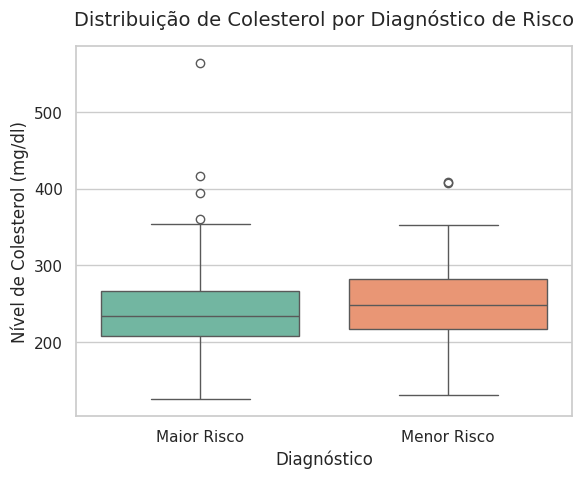

In [31]:
sns.boxplot(y='colesterol', x='risco_ataque_cardiaco', data=df, palette='Set2')

plt.title('Distribuição de Colesterol por Diagnóstico de Risco', fontsize=14, pad=15)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Nível de Colesterol (mg/dl)', fontsize=12)

plt.show()

O Boxplot confirma a ausência de correlação linear (Pearson = -0.09). A distribuição interquartil e as medianas de colesterol entre os grupos de maior e menor risco são visualmente sobreponíveis, indicando que este indicador, de forma isolada, não possui forte poder preditivo para esta amostra clínica.